In [2]:
import torch

In [3]:
device = torch.device("cuda")

In [4]:
device


device(type='cuda')

In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root ='data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root ='data',
    train = False,
    transform = ToTensor(),
    download = True,
)

In [7]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [8]:
print(train_data.targets.size())

torch.Size([60000])


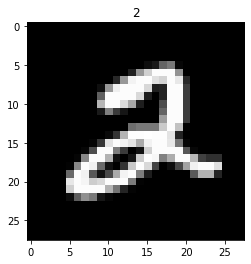

In [10]:
import matplotlib.pyplot as plt 
plt.imshow(train_data.data[5], cmap= "gray")
plt.title("%i" %train_data.targets[5])
plt.show()

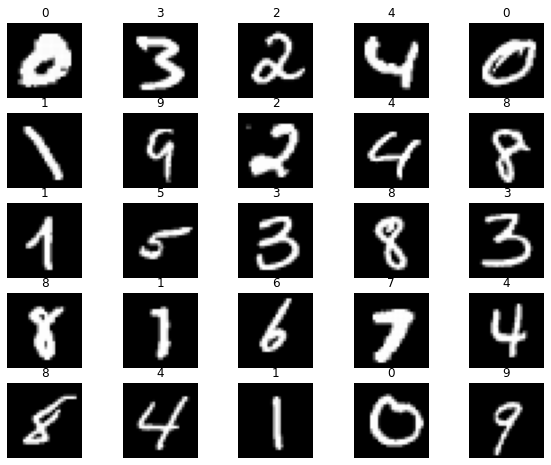

In [11]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [12]:
from torch.utils.data import DataLoader
loaders = {
    "train" : torch.utils.data.DataLoader(train_data,
                                          batch_size = 100,
                                          shuffle = True,
                                          num_workers = 1),
    "test" :  torch.utils.data.DataLoader(test_data,
                                          batch_size = 100,
                                          shuffle = True,
                                          num_workers = 1),
}
loaders


{'train': <torch.utils.data.dataloader.DataLoader at 0x7f4bd22b99a0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f4bd22b9dc0>}

In [14]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out = nn.Linear(32 *7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x
       

In [15]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [16]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [17]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [19]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    cnn.train()
    total_step=len(loaders["train"])
    
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders["train"]):
            batch_x = Variable(images)
            batch_y = Variable(labels)
            output = cnn(batch_x)[0]
            loss = loss_func(output, batch_y)
            
            optimizer.zero_grad()
            
            loss.backward()
            optimizer.step()
            
            if (i+1) % 100 == 0:                
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))  
                
train(num_epochs, cnn, loaders)

/home/mnegassi/.conda/envs/smartaugment/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/10], Step [100/600], Loss: 0.1060
Epoch [1/10], Step [200/600], Loss: 0.2378
Epoch [1/10], Step [300/600], Loss: 0.0696
Epoch [1/10], Step [400/600], Loss: 0.0233
Epoch [1/10], Step [500/600], Loss: 0.0691
Epoch [1/10], Step [600/600], Loss: 0.0539
Epoch [2/10], Step [100/600], Loss: 0.0388
Epoch [2/10], Step [200/600], Loss: 0.1656
Epoch [2/10], Step [300/600], Loss: 0.1063
Epoch [2/10], Step [400/600], Loss: 0.0758
Epoch [2/10], Step [500/600], Loss: 0.0780
Epoch [2/10], Step [600/600], Loss: 0.0539
Epoch [3/10], Step [100/600], Loss: 0.0088
Epoch [3/10], Step [200/600], Loss: 0.0265
Epoch [3/10], Step [300/600], Loss: 0.0704
Epoch [3/10], Step [400/600], Loss: 0.0265
Epoch [3/10], Step [500/600], Loss: 0.0718
Epoch [3/10], Step [600/600], Loss: 0.0988
Epoch [4/10], Step [100/600], Loss: 0.0393
Epoch [4/10], Step [200/600], Loss: 0.0129
Epoch [4/10], Step [300/600], Loss: 0.0177
Epoch [4/10], Step [400/600], Loss: 0.0224
Epoch [4/10], Step [500/600], Loss: 0.0362
Epoch [4/10

In [20]:
def test():
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            
        print('Test Accuracy of the model on the 60000 test images: %.2f' % accuracy)
        
test()

Test Accuracy of the model on the 60000 test images: 0.97


In [21]:
sample = next(iter(loaders['test']))
imgs, lbls = sample


In [23]:
actual_number = lbls[:10].numpy()
actual_number
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')


Prediction number: [7 6 6 7 1 2 7 0 4 0]
Actual number: [7 6 6 7 1 2 7 0 4 0]
